<a href="https://colab.research.google.com/github/IhratPramudya/Machine-Learning/blob/main/Tugas_Akhir_Machine_Learning_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

penjualan = pd.read_csv('Data/TADWBI.csv')

penjualan

,id_penjualan,tanggal,Propinsi,qty,vol_ml,nama_barang,total,nama_kurir,srv_lvl
0,4576,3-Jan-19,Banten,1,10,Basil,69000,JNE REG,Reg
1,4600,5-Jan-19,Banten,1,20,Lemongrass,99900,J&T CASHLESS,Exp
2,4600,5-Jan-19,Banten,1,20,Gurjun,28900,J&T CASHLESS,Exp
3,4600,5-Jan-19,Banten,1,10,Ylang Ylang,90500,J&T CASHLESS,Exp
4,4613,6-Jan-19,DKI Jakarta,2,1000,Cajuput,2107000,JNE REG,Reg
...,...,...,...,...,...,...,...,...,...
16263,8165,26-Jun-19,Jawa Barat,1,20,Ginger,187500,J&T CASHLESS,Exp
16264,8179,26-Jun-19,Jawa Barat,1,1000,Rosemary,2787500,JNE YES,Reg
16265,8179,26-Jun-19,Jawa Barat,1,500,Rosemary,1469000,JNE YES,Reg
16266,8203,27-Jun-19,Sumatera Utara,1,100,Olive,198000,JNE REG,Reg


In [ ]:
penjualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16268 entries, 0 to 16267
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_penjualan  16268 non-null  int64 
 1   tanggal       16268 non-null  object
 2   Propinsi      16268 non-null  object
 3   qty           16268 non-null  int64 
 4   vol_ml        16268 non-null  int64 
 5   nama_barang   16268 non-null  object
 6   total         16268 non-null  int64 
 7   nama_kurir    16268 non-null  object
 8   srv_lvl       16268 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
penjualan = penjualan.dropna()

print("Total data angka setelah menghapus nilai bariss missing values", len(penjualan))

Total data angka setelah menghapus nilai bariss missing values 16268


In [ ]:
penjualan.describe()

,id_penjualan,qty,vol_ml,total
count,16268.000000,16268.000000,16268.000000,1.626800e+04
mean,11068.337657,1.065220,19.523051,1.453428e+05
std,4147.034209,0.434412,55.051662,4.337966e+05
min,4521.000000,1.000000,1.000000,0.000000e+00
25%,7330.000000,1.000000,10.000000,8.650000e+04
50%,10810.000000,1.000000,10.000000,1.025000e+05
75%,14557.500000,1.000000,10.000000,1.359000e+05
max,18776.000000,30.000000,1000.000000,4.771200e+07


In [ ]:
drop_label = ['tanggal', 'vol_ml', 'total', 'nama_kurir', 'srv_lvl', 'qty', 'id_penjualan']

penjualan.drop(drop_label, inplace=True, axis=1)


penjualan

,Propinsi,nama_barang
0,Banten,Basil
1,Banten,Lemongrass
2,Banten,Gurjun
3,Banten,Ylang Ylang
4,DKI Jakarta,Cajuput
...,...,...
16263,Jawa Barat,Ginger
16264,Jawa Barat,Rosemary
16265,Jawa Barat,Rosemary
16266,Sumatera Utara,Olive


In [ ]:

from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(penjualan['Propinsi'])
label2 = le.fit_transform(penjualan['nama_barang'])



# removing the column 'Propinsi' from df
# as it is of no use now.

# dropLabel = ['Propinsi', 'nama_barang']
# penjualan.drop("Propinsi", axis=1, inplace=True)
# penjualan.drop("nama_barang", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Propinsi'
penjualan["Propinsi"] = label
penjualan["nama_barang"] = label2

# printing Dataframe
penjualan

,Propinsi,nama_barang
0,2,6
1,2,46
2,2,37
3,2,74
4,4,11
...,...,...
16263,8,33
16264,8,58
16265,8,58
16266,33,50


Text(0, 0.5, 'nama_barang')

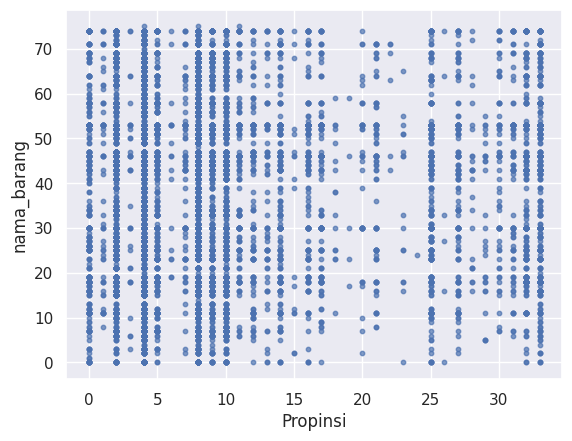

In [ ]:
points = penjualan.loc[:, 'Propinsi':'nama_barang'].values
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=10, alpha=0.7)
plt.xlabel('Propinsi')
plt.ylabel('nama_barang')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


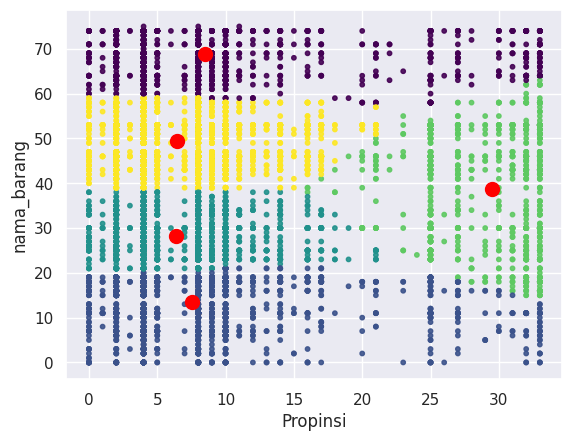

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x, y, c=predicted_cluster_indexes, s=10, alpha=0.9, cmap='viridis')
plt.xlabel('Propinsi')
plt.ylabel('nama_barang')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [ ]:
df = penjualan.copy()
df['Cluster'] = kmeans.predict(points)
df.head()

,Propinsi,nama_barang,Cluster
0,2,6,1
1,2,46,4
2,2,37,2
3,2,74,0
4,4,11,1


In [ ]:
df.sort_values(by=['Cluster'])

,Propinsi,nama_barang,Cluster
10350,4,68,0
9686,14,74,0
9685,14,69,0
2654,8,67,0
2656,9,74,0
...,...,...,...
6851,4,53,4
11249,2,41,4
11248,2,53,4
1995,10,53,4
